In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
file_path = 'cleaned_dataset_final.xlsx'  
df = pd.read_excel(file_path)

In [58]:
metric_columns = [col for col in df.columns if col.startswith('metric_')]
metrics = df[metric_columns].stack().reset_index(drop=True)

metric_counts = metrics.value_counts()

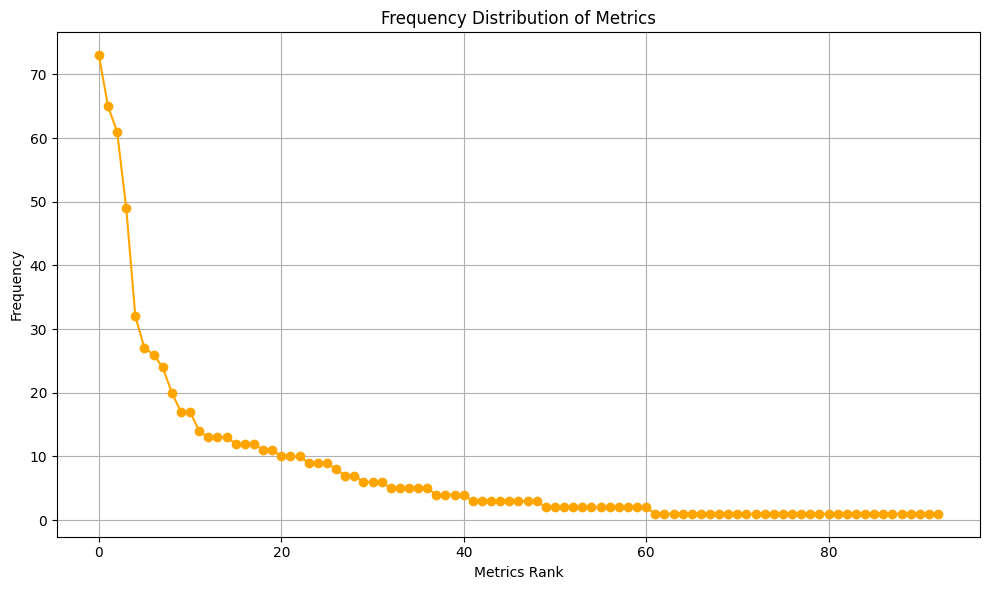

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# --------------------- Remoção por Frequencia ---------------------

# Definindo o limite de frequencia para identificar outliers
low_frequency_threshold = 3  

# Identificar métricas que são consideradas outliers com base na baixa frequencia
low_frequency_outliers = metric_counts[metric_counts <= low_frequency_threshold].index

low_frequency_outliers

# Remover métricas que são outliers com base na baixa frequencia
# metrics_filtered_by_frequency = metrics[~metrics.isin(low_frequency_outliers)]

Index(['Delivery on time', 'Disponibilidade do produto', 'Tempo melhorias',
       'WIP', 'Aquisição', 'DORA Metrics', 'Quantidade de alertas',
       'Bugs density', 'Planned hours', 'Time to recover',
       'Cultura Organizacional', 'EBTDA', 'Evolução de Produto',
       'Tempo médio de recuperação', 'Metricas de uso', 'BPS',
       'Indicator about risky user stories', 'RAID', 'Number of deployments',
       'Backlog', 'Quantidade de solicitações de clientes',
       'Commit Review Performance', 'Change failure rate', 'Role Time Measure',
       'Pulse', 'Burn-up', 'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceções', 'CES', 'Transações', 'EAC',
       'Rejected Product Backlog Items', 'Compliance', 'SRE', '9box',
       'Telas por sessão', 'Taxa de Retenção', 'Time in meeting', 'Curva S',
       '\n', 'Critica

In [61]:
# --------------------- Remoção por Desvio Padrão ---------------------

mean_frequency = metric_counts.mean()
std_frequency = metric_counts.std()

print("Média da frequência: ", mean_frequency)
print("Desvio padrão: ", std_frequency)

# Definir o número de desvios padrão abaixo do qual as métricas são consideradas outliers
n_std = 0.5  

# Identificar métricas que são outliers com base no desvio padrão
std_outliers = metric_counts[metric_counts < (mean_frequency - n_std * std_frequency)].index

print(std_outliers)
# Remover métricas que são outliers com base no desvio padrão
# metrics_filtered_by_std = metrics[~metrics.isin(std_outliers)]

Média da frequência:  7.956989247311828
Desvio padrão:  13.311415482253848
Index(['Quantidade de solicitações de clientes', 'Commit Review Performance',
       'Change failure rate', 'Role Time Measure', 'Pulse', 'Burn-up',
       'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceções', 'CES', 'Transações', 'EAC',
       'Rejected Product Backlog Items', 'Compliance', 'SRE', '9box',
       'Telas por sessão', 'Taxa de Retenção', 'Time in meeting', 'Curva S',
       '\n', 'Critical bugs', 'Budget orçado vs. custo atual',
       'Cost Devitation', 'Lei de Little', 'Tempo de resposta'],
      dtype='object')


In [62]:
percentile_threshold = 65     # Ajuste este valor para definir o percentil desejado (ex: 10, 5, etc.)

# Calcular o valor de frequência correspondente ao percentil
frequency_threshold = metric_counts.quantile(percentile_threshold / 100)

# Identificar métricas que são outliers com base no percentil
percentile_outliers = metric_counts[metric_counts <= frequency_threshold].index

# Exibir as métricas identificadas como outliers
print(f"Métricas removidas (Abaixo do {percentile_threshold}º Percentil):")
print(percentile_outliers)

Métricas removidas (Abaixo do 65º Percentil):
Index(['Delivery to customer', 'Clima', 'Horas extras',
       'Cumulative Flow Diagrams', 'Produto', 'Apdex', 'Turnover',
       'Contact Rate', 'Funil', 'Delivery on time',
       'Disponibilidade do produto', 'Tempo melhorias', 'WIP', 'Aquisição',
       'DORA Metrics', 'Quantidade de alertas', 'Bugs density',
       'Planned hours', 'Time to recover', 'Cultura Organizacional', 'EBTDA',
       'Evolução de Produto', 'Tempo médio de recuperação', 'Metricas de uso',
       'BPS', 'Indicator about risky user stories', 'RAID',
       'Number of deployments', 'Backlog',
       'Quantidade de solicitações de clientes', 'Commit Review Performance',
       'Change failure rate', 'Role Time Measure', 'Pulse', 'Burn-up',
       'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceçõ

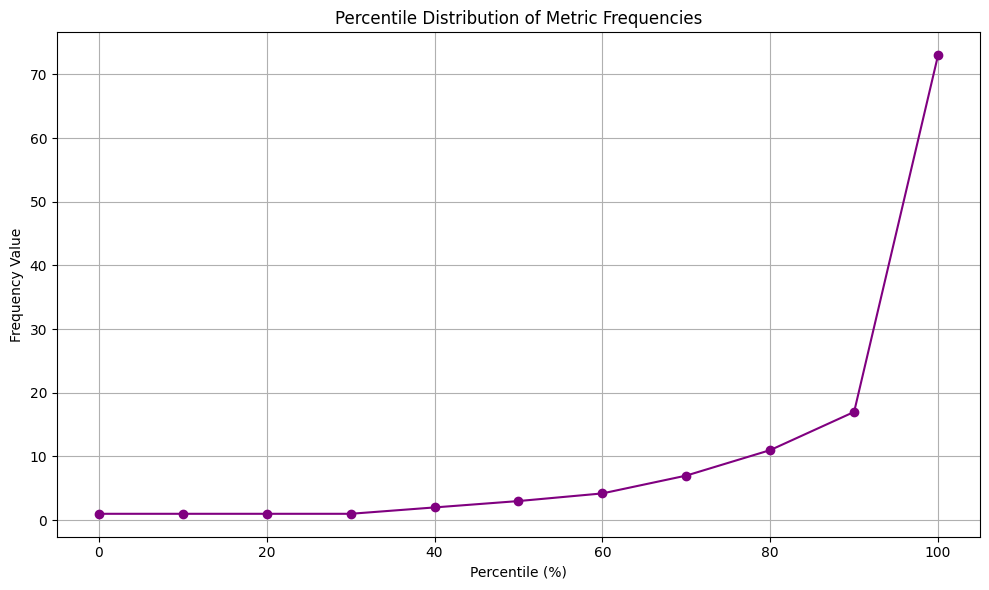

In [63]:
percentiles = np.arange(0, 101, 10)  # Percentis de 0 a 100, em incrementos de 10
percentile_values = np.percentile(metric_counts, percentiles)

# Plotar o gráfico dos percentis das métricas
plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values, marker='o', linestyle='-', color='purple')
plt.xlabel('Percentile (%)')
plt.ylabel('Frequency Value')
plt.title('Percentile Distribution of Metric Frequencies')
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# removendo basedo no percentil 
metrics_filtered_by_percentile = metrics[~metrics.isin(percentile_outliers)]


In [65]:
metric_counts_filtered = metrics_filtered_by_percentile.value_counts()

# Definir o limite de frequência para identificar novos outliers
low_frequency_threshold = 3  # Ajuste este valor conforme necessário

# Identificar métricas que são consideradas outliers com base na nova baixa frequência
low_frequency_outliers = metric_counts_filtered[metric_counts_filtered <= low_frequency_threshold].index

# Exibir as métricas identificadas como outliers com base na baixa frequência
print("\nMétricas removidas (Baixa Frequência):")
print(low_frequency_outliers)


Métricas removidas (Baixa Frequência):
Index([], dtype='object')


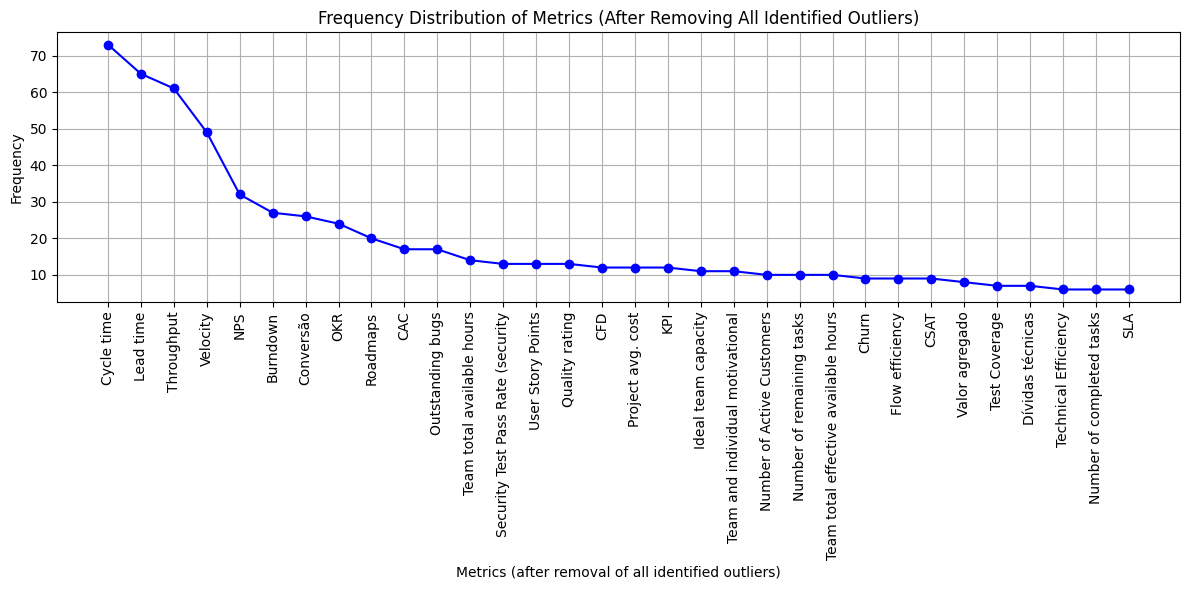

In [66]:
metric_counts_filtered_after_low_freq = metrics_filtered_by_percentile[~metrics_filtered_by_percentile.isin(low_frequency_outliers)].value_counts()

# Plotar a distribuição de frequência após remoção dos outliers por baixa frequência
plt.figure(figsize=(12, 6))
metric_counts_filtered_after_low_freq_sorted = metric_counts_filtered_after_low_freq.sort_values(ascending=False)
plt.plot(metric_counts_filtered_after_low_freq_sorted.index, metric_counts_filtered_after_low_freq_sorted.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Metrics (after removal of all identified outliers)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Metrics (After Removing All Identified Outliers)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
df_filtered = df.copy()
for col in metric_columns:
    df_filtered[col] = df_filtered[col].apply(lambda x: None if x in percentile_outliers else x)

# Remover as colunas de métricas que ficaram vazias após a filtragem
df_filtered.dropna(axis=1, how='all', inplace=True)

# Salvar o dataset filtrado em um novo arquivo Excel
df_filtered.to_excel("cleaned_dataset_no_percentile_outliers.xlsx", index=False)